<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/Lesson%203.%20RNN%20(LSTM%2C%20GRU%2C%20BiRNN)/3.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%20RNN%20%D0%B2%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B8%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Разработка RNN модели с использованием TensorFlow

Создание рекуррентной нейронной сети (RNN) с использованием TensorFlow для решения различных задач требует глубокого понимания особенностей и тонкостей настройки параметров модели. В данном руководстве мы рассмотрим основные этапы разработки и обучения RNN для задач регрессии, классификации, кластеризации и обработки естественного языка (NLP).

## Введение в RNN

Рекуррентные нейронные сети (RNN) отличаются от обычных нейронных сетей наличием внутренней памяти, что позволяет им учитывать последовательность и зависимости данных. Это делает их особенно эффективными для работы с временными рядами, текстовыми данными, аудио и видео, где важен порядок следования элементов.

### Преимущества RNN:

- **Сохранение информации**: RNN могут запоминать информацию о предыдущих входах благодаря своей внутренней структуре.
- **Гибкость в обработке последовательностей**: модели могут работать с последовательностями переменной длины, что позволяет им адаптироваться к различным задачам.

Для реализации RNN в TensorFlow мы будем использовать высокоуровневую библиотеку Keras, которая предоставляет удобные интерфейсы и готовые слои, что значительно упрощает процесс разработки моделей.

## Подготовка данных

Перед реализацией RNN важно правильно подготовить данные. Этапы подготовки могут включать следующие шаги:

1. **Сбор и разметка данных**: собираем необходимые данные и при необходимости проводим их разметку.
2. **Разделение данных**: делим данные на тренировочную, валидационную и тестовую выборки для последующей оценки модели.
3. **Преобразование данных**: нормализуем данные (для временных рядов) или токенизируем текст (для NLP), чтобы привести их в формат, подходящий для RNN.
4. **Создание временных окон**: формируем временные окна для задач с временными рядами и NLP, что позволяет модели учитывать предшествующие значения.

Далее мы рассмотрим основные шаги реализации RNN для различных типов задач.

## 1. RNN для регрессии

Регрессия применяется, когда нужно предсказать непрерывные значения, такие как цены акций, уровень температуры или другие количественные характеристики.

### Шаг 1: Подготовка данных

Для регрессии с временными рядами часто применяют **окна скользящего среднего**. Это позволяет модели учитывать контекст предыдущих значений.

- Разделите временной ряд на последовательности фиксированной длины, используя, например, `tf.keras.preprocessing.sequence.TimeseriesGenerator`.
- Нормализуйте данные для повышения устойчивости модели, что помогает улучшить сходимость во время обучения.

### Шаг 2: Построение модели RNN

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Определяем параметры модели
window_size = 10  # длина окна
num_features = 1  # количество признаков

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features)),
    Dense(1)  # Один выходной нейрон для предсказания непрерывного значения
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
```

### Шаг 3: Тренировка модели

```python
history = model.fit(train_data, train_labels, epochs=50, validation_data=(val_data, val_labels))
```

### Шаг 4: Оценка модели

Для оценки точности предсказаний используем метрики **MSE** (среднеквадратичная ошибка) и **MAE** (средняя абсолютная ошибка).

```python
test_loss, test_mae = model.evaluate(test_data, test_labels)
```

### Шаг 5: Гиперпараметры

Для регрессии важно настроить следующие параметры:

- **Количество нейронов**: это влияет на способность модели обобщать данные. Большее количество нейронов может повысить точность, но также увеличивает риск переобучения.
- **Длина окна**: чем больше окно, тем больше данных учитывается, что может улучшить предсказания.
- **Количество эпох и размер батча**: большее количество эпох с меньшим размером батча может помочь улучшить результаты, но замедляет обучение.

## 2. RNN для классификации

Классификация используется для анализа текстов, предсказания событий, определения категории текста и других задач, связанных с разделением данных на классы.

### Шаг 1: Подготовка данных

Для задач классификации необходимо:

- Токенизировать данные (если это текст) с помощью `Tokenizer`, чтобы преобразовать слова в числовые последовательности.
- Выравнивать последовательности с помощью `pad_sequences`, чтобы получить фиксированную длину входных данных, что важно для работы RNN.

### Шаг 2: Построение модели RNN

```python
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Параметры модели
vocab_size = 10000  # размер словаря
embedding_dim = 128  # размер вектора эмбеддинга
max_length = 100  # максимальная длина последовательности
num_classes = 3  # количество классов

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    SimpleRNN(50, activation='tanh'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

### Шаг 3: Тренировка модели

```python
history = model.fit(train_data, train_labels, epochs=20, validation_data=(val_data, val_labels))
```

### Шаг 4: Оценка модели

Для оценки качества классификации применяются метрики **Accuracy** (точность), **Precision** и **Recall**:

```python
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
```

### Шаг 5: Гиперпараметры

Для задач классификации важно учитывать следующие параметры:

- **Размер вектора эмбеддинга**: увеличивает пространство признаков для текстовых данных, что может улучшить качество классификации.
- **Количество классов**: для мультиклассовой классификации выбираем функцию потерь `categorical_crossentropy`.
- **Количество эпох и размер батча**: эти параметры влияют на качество и скорость тренировки модели, и их настройка требует экспериментов.

## 3. RNN для кластеризации

Задачи кластеризации требуют выявления скрытых групп в данных. RNN не так часто применяются для кластеризации, но могут быть полезны, например, для анализа временных рядов, где цель — разделить данные на различные паттерны.

### Шаг 1: Подготовка данных

Для кластеризации временных рядов:

- Разделите данные на временные окна, что позволяет извлекать особенности временных зависимостей.
- Нормализуйте данные, так как RNN чувствительна к масштабированию данных.

### Шаг 2: Построение модели RNN

Обычно используют RNN с функцией потерь **Mean Squared Error (MSE)** и обучают ее на невиданных данных. На этапе вывода можно применять алгоритмы кластеризации, такие как KMeans, к полученным признакам.

```python
from sklearn.cluster import KMeans

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features), return_sequences=True),
    Dense(10, activation='relu')  # Несколько выходных нейронов для извлечения признаков
])
model.compile(optimizer='adam', loss='mse')
```

### Шаг 3: Получение признаков и кластеризация

После тренировки RNN примените ее к данным и извлеките признаки. На основе этих признаков проведите кластеризацию с помощью KMeans.

```python
features = model.predict(data)
kmeans = KMeans(n_clusters=num_clusters).fit(features)
clusters = kmeans.predict(features)
```

## 4. RNN для NLP задач

Для задач обработки естественного языка, таких как машинный перевод и анализ тональности, часто используются RNN, особенно такие их разновидности, как LSTM и GRU, которые лучше справляются с длинными зависимостями в тексте.

### Шаг 1: Подготовка данных

- **Токенизация текста**: преобразуем текст в последовательности индексов с помощью `Tokenizer`, что позволяет модели работать с текстовыми данными.
- **Выравнивание длины последовательностей**: используем `pad_sequences`, чтобы привести все последовательности к одной длине, что критически важно для обучения.

### Шаг 2: Построение модели RNN для NLP

```python
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Параметры модели
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Для задач бинарной классификации
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

### Шаг 3: Тренировка модели



```python
history = model.fit(train_data, train_labels, epochs=20, validation_data=(val_data, val_labels))
```

### Шаг 4: Оценка модели

Оценку NLP-модели можно проводить по метрикам **Accuracy**, **Precision**, **Recall** и **F1**:

```python
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
```

### Шаг 5: Гиперпараметры

При настройке гиперпараметров для задач NLP необходимо учитывать:

- **Количество нейронов в скрытых слоях**: это влияет на способность модели захватывать сложные зависимости в данных.
- **Размер вектора эмбеддинга**: его увеличение может улучшить качество представления слов.
- **Количество LSTM/GRU слоев**: увеличение количества слоев может повысить качество модели, но также увеличивает риск переобучения.



Давайте подробнее рассмотрим примеры реализации RNN в TensorFlow для различных задач, включая более конкретные подходы и кодовые фрагменты.

### 1. RNN для Регрессии: Пример Прогнозирования Временных Рядов

Рассмотрим пример, в котором мы предсказываем цены акций на основе исторических данных.


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  62/2227 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0077

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2227/2227 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 2/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 9.2587e-04 - val_loss: 3.9762e-04
Epoch 3/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 7.2513e-04 - val_loss: 8.4534e-04
Epoch 4/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.8743e-04 - val_loss: 0.0014
Epoch 5/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.5685e-04 - val_loss: 6.2118e-04
Epoch 6/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.5531e-04 - val_loss: 7.9921e-04
Epoch 7/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6.2571e-04 - val_loss: 6.4645e-04
Epoch 8/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 7.9502e-04 - val_loss: 6.3657e-04
Epoch 9/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.6882e-04 - val_loss: 7.5380e-04
Epoch 10/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 4.6446e-04 - val_loss: 4.4635e-04
Epoch 11/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - 

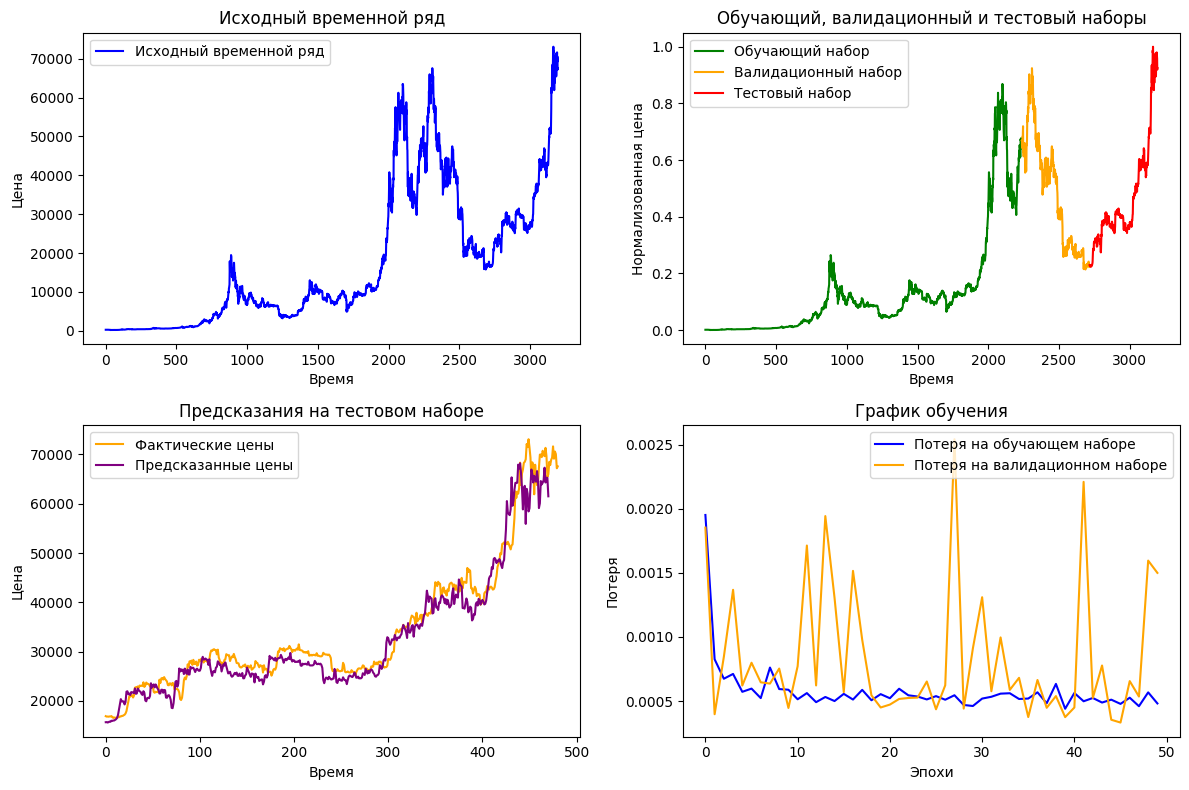

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
window_size = 10
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
val_generator = TimeseriesGenerator(val, val, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)

# Создание и обучение модели
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

Давайте разберем код шаг за шагом:

### 1. Импорт библиотек
```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt
```
- **pandas**: используется для работы с данными в формате таблиц (DataFrame).
- **numpy**: библиотека для работы с многомерными массивами и матрицами.
- **MinMaxScaler**: нормализует данные в диапазоне от 0 до 1.
- **TimeseriesGenerator**: генерирует временные последовательности для обучения моделей.
- **Sequential**: позволяет создавать модели нейронных сетей поэтапно.
- **SimpleRNN, Dense, Dropout**: различные слои для построения нейронной сети.
- **matplotlib.pyplot**: используется для визуализации данных и графиков.

### 2. Загрузка данных
```python
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)
```
- Загружаем данные из CSV файла, содержащего цены на Bitcoin.
- Извлекаем колонку 'Close' (закрытие) и преобразуем ее в массив.

### 3. Нормализация данных
```python
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)
```
- Создаем объект `MinMaxScaler`.
- Нормализуем цены, чтобы они находились в диапазоне от 0 до 1, что помогает улучшить обучение модели.

### 4. Разделение данных на выборки
```python
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]
```
- Определяем размеры обучающей (70%), валидационной (15%) и тестовой (15%) выборок.
- Разделяем нормализованные данные на три части.

### 5. Генерация временных последовательностей
```python
window_size = 10
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
val_generator = TimeseriesGenerator(val, val, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)
```

Давайте подробнее разберем код, связанный с `window_size` и `TimeseriesGenerator`:

### Параметр `window_size`

```python
window_size = 10
```

- **Определение**: `window_size` (размер окна) — это количество временных шагов (или временных точек), которые будут использоваться для создания входных данных для модели. В данном случае размер окна равен 10.
  
- **Зачем нужен**: Этот параметр определяет, сколько предыдущих значений временного ряда будет использовано для предсказания следующего значения. Например, если у вас есть временной ряд с данными о ценах, вы можете использовать последние 10 значений, чтобы предсказать 11-е значение.

### Использование `TimeseriesGenerator`

```python
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
val_generator = TimeseriesGenerator(val, val, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)
```

- **Объяснение**:
  - `TimeseriesGenerator` — это класс из библиотеки Keras, который создает генераторы для временных рядов. Он позволяет автоматически формировать пары (входные данные и целевые значения) на основе заданного размера окна.

- **Параметры**:
  - `train`, `val`, `test`: Это массивы данных, из которых будут созданы последовательности.
  - `length=window_size`: Указывает, сколько предыдущих значений будет использоваться для предсказания следующего значения. В нашем случае это 10.
  - `batch_size=1`: Указывает, сколько последовательностей будет возвращено за один раз. В данном случае это 1, что означает, что генератор будет возвращать одну последовательность за раз.

### Пример работы

Если у вас есть временной ряд, например, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], то `TimeseriesGenerator` с `window_size = 10` будет создавать следующие пары:

- Вход: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] → Целевое: 11
- Вход: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11] → Целевое: 12

Таким образом, генератор создает последовательности, которые модель может использовать для обучения. Это позволяет эффективно обрабатывать временные ряды и обучать модели, такие как RNN или LSTM, которые учитывают порядок данных.



### 6. Создание и обучение модели
```python
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_generator, epochs=50, validation_data=val_generator)
```

Давайте подробнее разберем код, связанный с созданием модели с использованием `Sequential`, `SimpleRNN`, `Dropout` и `Dense`.

### 1. Создание модели

```python
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])
```

### 2. Параметры модели

- **`Sequential`**:
  - Это тип модели в Keras, который позволяет строить нейронные сети, состоящие из последовательных слоев. Каждый слой принимает входные данные и передает их следующему слою.
  
- **`SimpleRNN(50, activation='tanh', input_shape=(window_size, 1))`**:
  - **`SimpleRNN`**: Это слой рекуррентной нейронной сети (RNN). Он подходит для обработки последовательных данных, таких как временные ряды.
  - **`50`**: Это количество единиц (нейронов) в слое RNN. Чем больше единиц, тем больше информации модель может запомнить, но это также увеличивает вычислительные затраты.
  - **`activation='tanh'`**: Это функция активации, используемая в нейронах слоя. `tanh` (гиперболический тангенс) выводит значения в диапазоне от -1 до 1, что помогает избежать проблем с затухающими градиентами.
  - **`input_shape=(window_size, 1)`**: Это форма входных данных, которую ожидает слой. В данном случае:
    - `window_size` — это количество временных шагов (например, 10).
    - `1` — это количество признаков на каждом временном шаге (например, одно значение, такое как цена).

- **`Dropout(0.2)`**:
  - Этот слой используется для уменьшения переобучения модели.
  - **`0.2`** означает, что 20% нейронов будут случайно отключены во время обучения. Это помогает модели стать более обобщающей и предотвращает зависимость от определенных нейронов.

- **`Dense(1)`**:
  - Это полносвязный (или плотный) слой, который имеет 1 нейрон.
  - Он используется для вывода конечного результата. В задачах регрессии, например, он будет предсказывать одно значение (например, следующее значение временного ряда).

### Результат

Таким образом, модель представляет собой последовательность из трех слоев:
1. **Слой RNN**: Обрабатывает входные последовательности и извлекает временные зависимости.
2. **Слой Dropout**: Уменьшает риск переобучения.
3. **Слой Dense**: Выдает предсказание на основе выходных данных предыдущего слоя.

### Пример работы

При обучении этой модели на временном ряде:
- Модель будет принимать последовательности длиной `window_size` (например, 10) и предсказывать следующее значение на основе этих последовательностей.
- Слой RNN будет извлекать временные зависимости, слой Dropout будет предотвращать переобучение, а слой Dense будет выдавать финальное предсказание.

Эта архитектура хорошо подходит для задач прогнозирования временных рядов благодаря способности RNN обрабатывать последовательные данные и запоминать контекст.




Теперь, давайте подробнее разберем строки кода, связанные с компиляцией и обучением модели:

### 1. Компиляция модели

```python
model.compile(optimizer='adam', loss='mean_squared_error')
```

- **`model.compile`**: Этот метод подготавливает модель к обучению. Он определяет, как модель будет обновлять свои параметры на основе ошибок, которые она делает.

- **Параметры**:
  - **`optimizer='adam'`**:
    - **Оптимизатор** — это алгоритм, который используется для обновления весов модели на основе градиентного спуска.
    - **Adam** (Adaptive Moment Estimation) — это один из самых популярных оптимизаторов. Он адаптивно изменяет скорость обучения для каждого параметра, что позволяет эффективно обучать модели.
  
  - **`loss='mean_squared_error'`**:
    - **Функция потерь** (или функция ошибки) измеряет, насколько хорошо модель предсказывает целевые значения.
    - **Mean Squared Error (MSE)** — это среднее значение квадратов ошибок между предсказанными и фактическими значениями. Чем меньше значение MSE, тем лучше модель.

### 2. Обучение модели

```python
history = model.fit(train_generator, epochs=50, validation_data=val_generator)
```

- **`model.fit`**: Этот метод запускает процесс обучения модели на предоставленных данных.

- **Параметры**:
  - **`train_generator`**: Это генератор, который предоставляет данные для обучения модели. Он будет выдавать последовательности данных, которые модель будет использовать для обучения.
  
  - **`epochs=50`**:
    - **Эпохи** — это количество полных проходов по всему обучающему набору данных. В данном случае модель будет обучаться 50 эпох.
    - На каждой эпохе модель обновляет свои веса, основываясь на ошибках, которые она сделала на предыдущем шаге.

  - **`validation_data=val_generator`**:
    - Это данные, которые будут использоваться для оценки производительности модели после каждой эпохи.
    - Модель будет проверять, как хорошо она обучилась, используя данные из `val_generator`, и это поможет избежать переобучения.

### Результат

- **`history`**: Эта переменная будет содержать информацию о процессе обучения, включая значения функции потерь и метрики на обучающих и валидационных данных для каждой эпохи. Это может быть полезно для анализа и визуализации результатов обучения.

### Пример

Если вы обучаете модель на временном ряде, то в каждой эпохе модель будет:
1. Получать последовательности данных из `train_generator`.
2. Предсказывать значения на основе этих последовательностей.
3. Сравнивать предсказания с фактическими значениями, вычисляя MSE.
4. Обновлять свои параметры с использованием оптимизатора Adam.
5. Проверять производительность на валидационных данных с помощью `val_generator`.

Таким образом, эти строки кода настраивают и запускают процесс обучения модели, позволяя ей учиться на данных и улучшать свои предсказания.


### 7. Предсказания
```python
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация
```
- Используем модель для предсказания цен на тестовом наборе.
- Обратная нормализация предсказанных значений для получения исходных цен.

### 8. Визуализация
```python
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
# ...

plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
# ...

plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
# ...

plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
# ...

plt.tight_layout()
plt.show()
```
- Создаем графики для визуализации:
  - Исходного временного ряда.
  - Обучающего, валидационного и тестового наборов.
  - Фактических и предсказанных цен.
  - Потерь на обучающем и валидационном наборах.

Каждый шаг кода выполняет конкретную задачу, чтобы в итоге создать и обучить модель для предсказания цен на Bitcoin на основе временных рядов.

#LSTM

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  47/2227 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0201

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2227/2227 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0033 - val_loss: 9.5011e-04
Epoch 2/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 7.3470e-04 - val_loss: 0.0021
Epoch 4/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 7.1243e-04 - val_loss: 0.0011
Epoch 5/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 6.4423e-04 - val_loss: 8.6723e-04
Epoch 6/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.8210e-04 - val_loss: 0.0024
Epoch 7/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 4.4522e-04 - val_loss: 4.3684e-04
Epoch 8/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 6.1111e-04 - val_loss: 3.9063e-04
Epoch 9/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 4.0191e-04 - val_loss: 5.1152e-04
Epoch 10/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3.8775e-04 - val_loss: 3.7611e-04
Epoch 11/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.

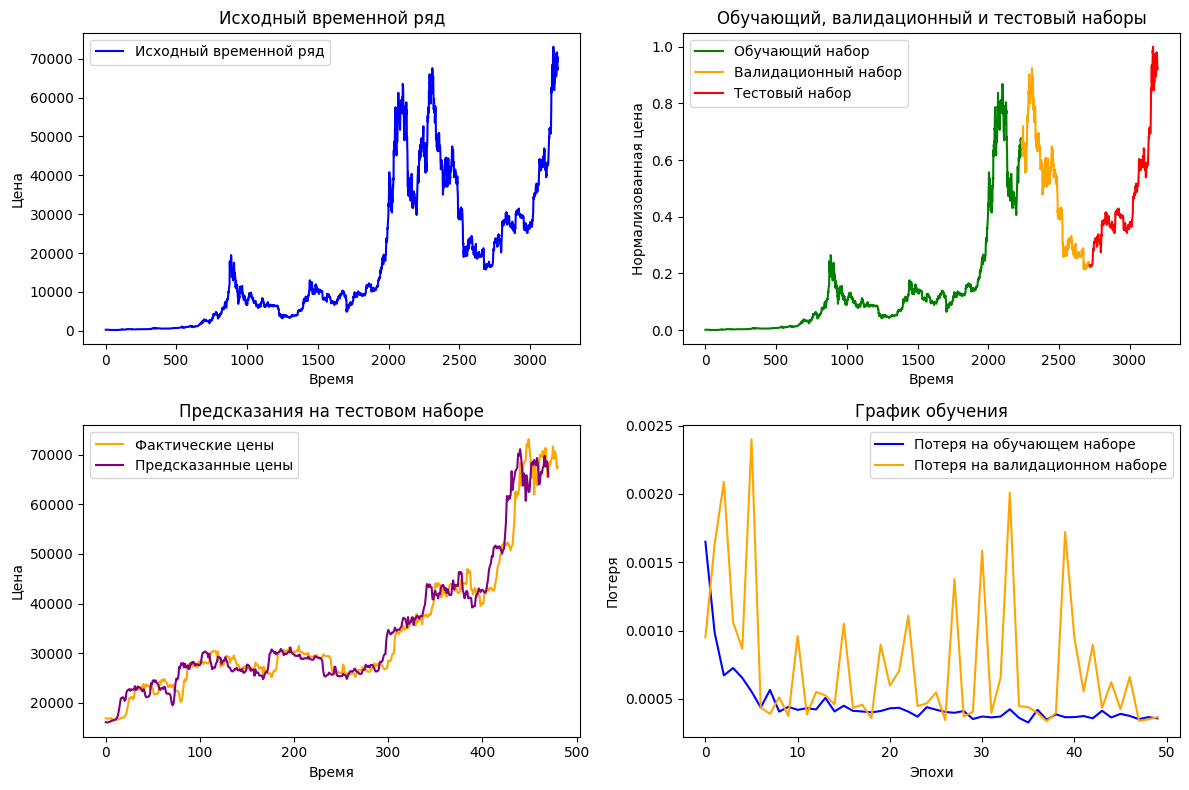

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
window_size = 10
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
val_generator = TimeseriesGenerator(val, val, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)

# Создание и обучение модели
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()


```
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])
```
Этот код создает модель нейронной сети с использованием Keras, которая включает в себя слой LSTM. Давайте разберем его по частям:

1. **Sequential**: Это тип модели, который позволяет добавлять слои последовательно, один за другим.

2. **LSTM(50, activation='tanh', input_shape=(window_size, 1))**:
   - **LSTM** (Long Short-Term Memory) — это тип рекуррентной нейронной сети, оптимизированный для работы с последовательными данными.
   - `50` указывает на количество единиц в слое LSTM, что определяет размер скрытого состояния.
   - `activation='tanh'` задает функцию активации, которая используется для нормализации выходных значений.
   - `input_shape=(window_size, 1)` задает форму входных данных, где `window_size` — это количество временных шагов, а `1` — количество признаков на каждом шаге.

3. **Dropout(0.2)**: Этот слой используется для регуляризации модели, отключая 20% нейронов во время обучения, что помогает предотвратить переобучение.

4. **Dense(1)**: Это полносвязный слой с одним выходом, который обычно используется для задач регрессии или бинарной классификации, где требуется одно значение на выходе.

Таким образом, эта модель предназначена для обработки последовательных данных с использованием LSTM, и включает механизм регуляризации для улучшения обобщающей способности модели.



##GRU

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  41/2227 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0347

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2227/2227 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 2/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 8.2543e-04 - val_loss: 5.2286e-04
Epoch 3/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.4685e-04 - val_loss: 5.6743e-04
Epoch 4/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 4.7441e-04 - val_loss: 0.0014
Epoch 5/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 6.5988e-04 - val_loss: 0.0013
Epoch 6/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 4.8919e-04 - val_loss: 3.7837e-04
Epoch 7/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.2269e-04 - val_loss: 4.0648e-04
Epoch 8/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 5.4562e-04 - val_loss: 5.4582e-04
Epoch 9/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 3.9074e-04 - val_loss: 4.6545e-04
Epoch 10/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 4.7816e-04 - val_loss: 4.7388e-04
Epoch 11/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step 

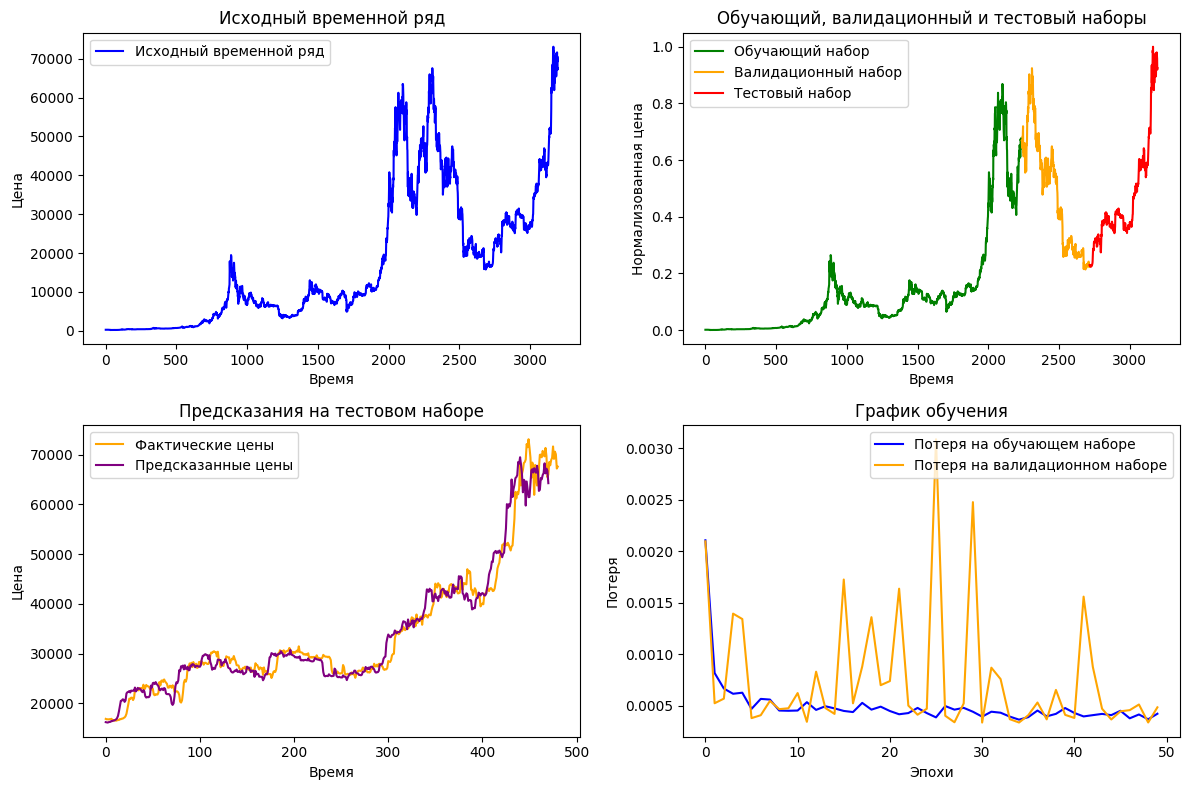

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
window_size = 10
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
val_generator = TimeseriesGenerator(val, val, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)

# Создание и обучение модели
model = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()



```
model = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])
```

Этот код создает простую модель нейронной сети с использованием Keras. Давайте разберем его по частям:

1. **Sequential**: Это тип модели, позволяющий добавлять слои последовательно, то есть один за другим.

2. **GRU(50, activation='tanh', input_shape=(window_size, 1))**:
   - **GRU** (Gated Recurrent Unit) — это тип рекуррентной нейронной сети, предназначенный для обработки последовательных данных.
   - `50` указывает на количество единиц GRU, что определяет размер скрытого состояния.
   - `activation='tanh'` задает функцию активации, используемую для нормализации выходных значений.
   - `input_shape=(window_size, 1)` задает форму входных данных, где `window_size` — это количество временных шагов, а `1` — количество признаков на каждом шаге.

3. **Dropout(0.2)**: Этот слой используется для регуляризации модели, случайным образом отключая 20% нейронов во время обучения. Это помогает предотвратить переобучение.

4. **Dense(1)**: Это полносвязный слой с одним выходом, который обычно используется для задач регрессии или бинарной классификации, где требуется одно значение на выходе.

Таким образом, эта модель предназначена для обработки последовательных данных с использованием GRU, и включает механизм регуляризации для улучшения обобщающей способности.




## Bidirectional

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  24/2227 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0087

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2227/2227 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 2/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 6.0893e-04 - val_loss: 0.0012
Epoch 3/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 6.2360e-04 - val_loss: 0.0036
Epoch 4/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 5.7919e-04 - val_loss: 4.2062e-04
Epoch 5/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 4.3987e-04 - val_loss: 4.0935e-04
Epoch 6/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 5.2676e-04 - val_loss: 4.8901e-04
Epoch 7/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 3.9835e-04 - val_loss: 4.4142e-04
Epoch 8/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 5.2809e-04 - val_loss: 9.9508e-04
Epoch 9/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 4.4819e-04 - val_loss: 3.8349e-04
Epoch 10/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 5.4340e-04 - val_loss: 4.1730e-04
Epoch 11/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step 

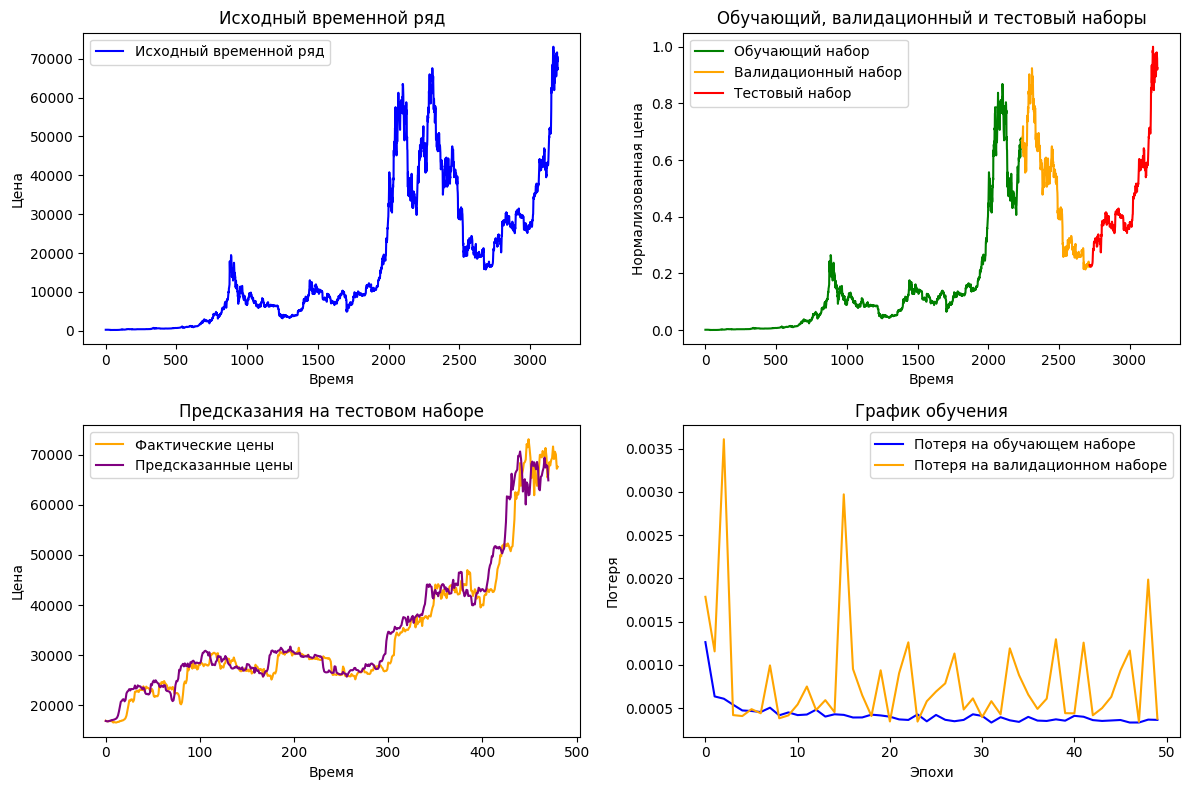

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
window_size = 10
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
val_generator = TimeseriesGenerator(val, val, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)

# Создание и обучение модели
model = Sequential([
    Bidirectional(GRU(50, activation='tanh', return_sequences=False), input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

Этот код создает и обучает модель нейронной сети с использованием библиотеки Keras. Давайте разберем его по частям:

1. **Sequential**: Это тип модели, который представляет собой линейную последовательность слоев. Слои добавляются один за другим.

2. **Bidirectional**: Этот слой позволяет модели обрабатывать последовательные данные в обоих направлениях (вперед и назад). Это полезно для задач, связанных с временными рядами или текстом, где контекст может быть важен как до, так и после текущего элемента.

3. **GRU(50, activation='tanh', return_sequences=False)**:
   - **GRU** (Gated Recurrent Unit) — это тип рекуррентной нейронной сети, который используется для обработки последовательных данных.
   - Параметр `50` указывает на количество единиц GRU, что определяет размер скрытого состояния.
   - `activation='tanh'` задает функцию активации, которая используется для нормализации выходных значений.
   - `return_sequences=False` означает, что слой будет возвращать только последнее состояние, а не последовательность состояний.

4. **Dropout(0.2)**: Этот слой используется для регуляризации модели, случайным образом отключая 20% нейронов во время обучения, что помогает предотвратить переобучение.

5. **Dense(1)**: Это полносвязный слой, который имеет 1 выход. Он обычно используется для задач регрессии или бинарной классификации, где требуется один выходной результат.


Давайте рассмотрим конкретный числовой пример, чтобы объяснить суть BiRNN (двунаправленной рекуррентной нейронной сети) с использованием GRU.

### Пример

Предположим, у нас есть последовательность слов, и мы хотим предсказать следующее слово на основе контекста. Рассмотрим следующую последовательность:

**Входная последовательность:** "Я люблю программировать на Python"

1. **Предобработка данных:**
   - Каждое слово преобразуется в вектор (например, с использованием word embeddings). Допустим, мы представим слова как векторы размерности 3:
     - "Я" → [0.1, 0.2, 0.3]
     - "люблю" → [0.4, 0.5, 0.6]
     - "программировать" → [0.7, 0.8, 0.9]
     - "на" → [0.1, 0.4, 0.5]
     - "Python" → [0.2, 0.3, 0.6]

2. **Формирование входных данных для BiRNN:**
   - Входные данные для модели будут представлять собой матрицу, где каждая строка соответствует вектору слова:
   ```
   [[0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6],
    [0.7, 0.8, 0.9],
    [0.1, 0.4, 0.5],
    [0.2, 0.3, 0.6]]
   ```

3. **Обработка через BiRNN:**
   - Модель будет обрабатывать эту последовательность как в прямом, так и в обратном направлении.
   - Например, для слова "программировать" модель будет учитывать контекст как слева (например, "Я", "люблю") так и справа (например, "на", "Python").

4. **Выходные данные:**
   - После обработки модель может предсказать следующее слово, например, "язык", основываясь на контексте, который учитывает как предшествующие, так и последующие слова.

### Как работает GRU в BiRNN

- **GRU** использует механизмы затворов для управления потоком информации:
  - **Обновляющий затвор** решает, какую информацию сохранить из предыдущего состояния.
  - **Сбрасывающий затвор** определяет, какую информацию забыть.
  


Таким образом, этот код создает модель для обработки последовательных данных, которая включает в себя возможности для учета контекста, регуляризации и получения единственного предсказания.

Теперь приведем гибридной модели RNN, использующей разные архитектуры, такие как LSTM и GRU. В этой модели используется последовательность LSTM, за которой следует GRU:

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  24/2227 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0659

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2227/2227 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.0041 - val_loss: 0.0093
Epoch 2/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0015 - val_loss: 9.8370e-04
Epoch 3/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 4/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 5/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 8.7168e-04 - val_loss: 0.0012
Epoch 6/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0010 - val_loss: 7.1328e-04
Epoch 7/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 8.9092e-04 - val_loss: 7.0044e-04
Epoch 8/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 8.1600e-04 - val_loss: 0.0010
Epoch 9/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 9.0755e-04 - val_loss: 8.7373e-04
Epoch 10/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 8.3400e-04 - val_loss: 5.2141e-04
Epoch 11/50
2227/2227 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 6.6566e-04 - val

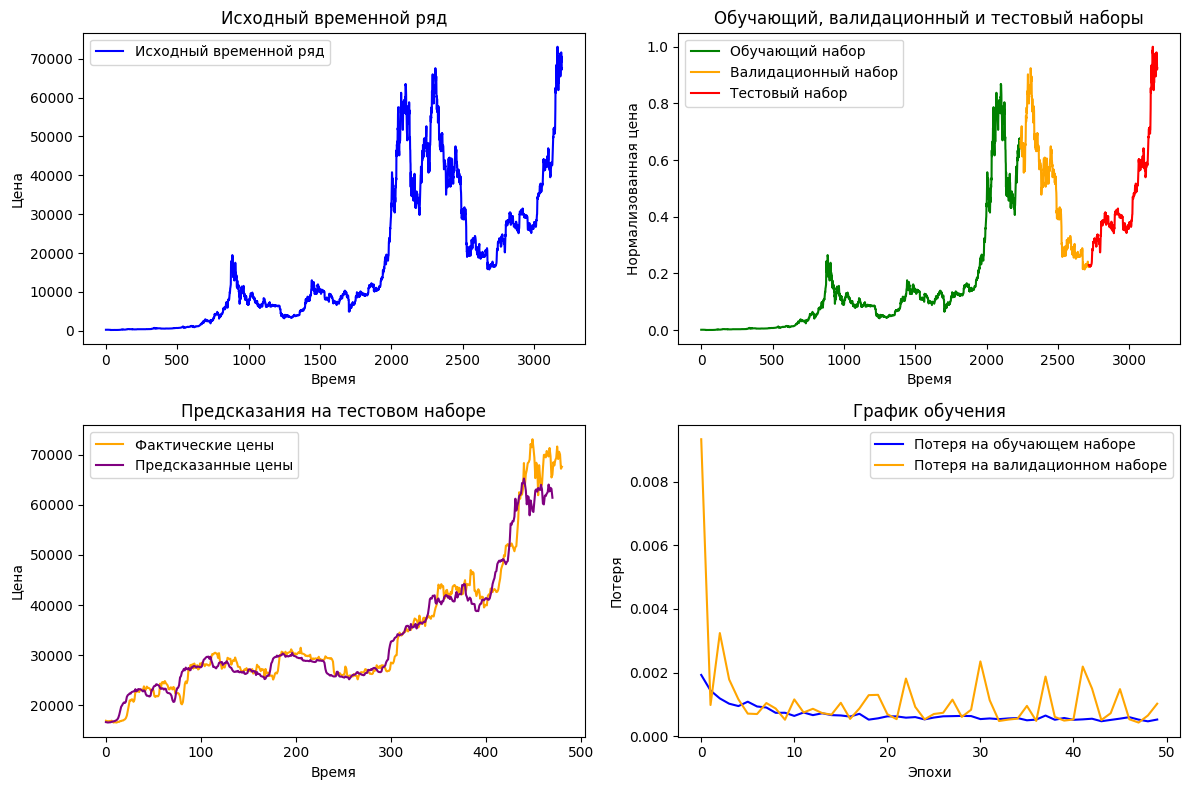

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
window_size = 10
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
val_generator = TimeseriesGenerator(val, val, length=window_size, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)

# Создание и обучение модели
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    GRU(50, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

```
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    GRU(50, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
```

В этом коде создается модель нейронной сети с использованием Keras, которая включает в себя слои LSTM и GRU. Давайте разберем его по частям:

1. **Sequential**: Это тип модели, который позволяет добавлять слои последовательно.

2. **LSTM(50, activation='tanh', return_sequences=True, input_shape=(window_size, 1))**:
   - **LSTM** (Long Short-Term Memory) — это тип рекуррентной нейронной сети, предназначенный для работы с последовательными данными.
   - `50` указывает на количество единиц в слое LSTM, что определяет размер скрытого состояния.
   - `activation='tanh'` задает функцию активации, которая используется для нормализации выходных значений.
   - `return_sequences=True` означает, что слой будет возвращать последовательность выходов для каждого шага времени, а не только последнее состояние. Это полезно, если следующий слой также является рекуррентным.

3. **Dropout(0.2)**: Этот слой используется для регуляризации, отключая 20% нейронов во время обучения, что помогает предотвратить переобучение.

4. **GRU(50, activation='tanh', return_sequences=False)**:
   - **GRU** (Gated Recurrent Unit) — это другой тип рекуррентной нейронной сети, который также используется для обработки последовательных данных.
   - `50` указывает на количество единиц в слое GRU.
   - `activation='tanh'` задает функцию активации.
   - `return_sequences=False` означает, что слой будет возвращать только последнее состояние.

5. **Dropout(0.2)**: Еще один слой Dropout для регуляризации после слоя GRU.

6. **Dense(1)**: Полносвязный слой с одним выходом, обычно используемый для задач регрессии или бинарной классификации.

Таким образом, эта модель сочетает в себе два типа рекуррентных слоев (LSTM и GRU), что позволяет ей эффективно обрабатывать последовательные данные и извлекать из них информацию.

Можно использовать EarlyStopping для остановки обучения модели, если она перестает показывать улучшения на валидационном наборе данных. Это позволяет избежать переобучения и сэкономить время, останавливая процесс обучения, когда модель больше не улучшает свои результаты.

Пример использования EarlyStopping:

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  46/2546 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0773

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0144 - val_loss: 0.0047
Epoch 2/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 3/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 4/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 5/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 6/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 7/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 8/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 9/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0035 - val_loss: 0.0041
Epoch 10/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 11/50
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0033 - val_loss: 0.0041
Epoch 12/50
2546/2546 ━━━━━━━━━━━━

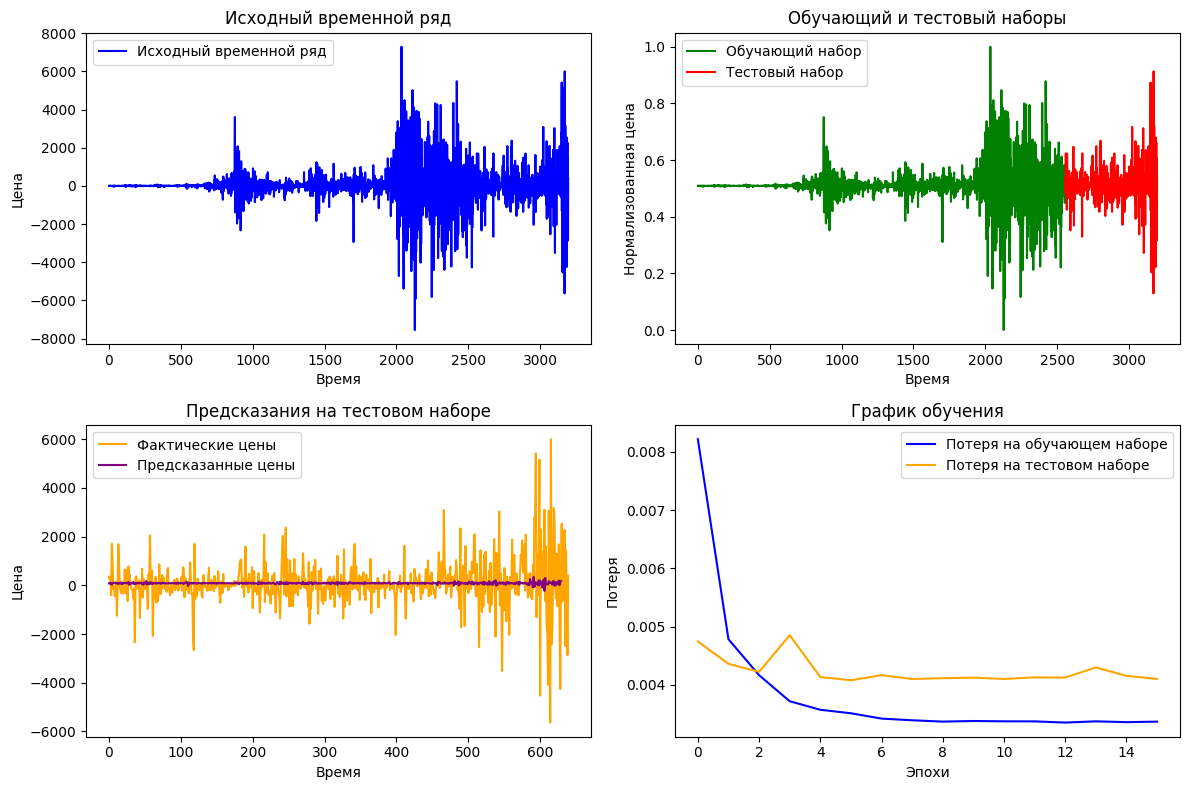

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Создание модели
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Настройка EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    callbacks=[early_stopping])


# Предсказания
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

# Визуализация
# График исходного временного ряда
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(predictions, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на тестовом наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

Теперь мы используем обученную модель для прогнозирования цен на 30 шагов вперед. Этот процесс включает в себя применение последнего известного значения временного ряда в качестве начальной точки для генерации предсказаний. В каждом шаге мы будем предсказывать следующую цену, обновляя входные данные на основе предыдущего предсказания. Это позволит нам оценить способность модели к экстраполяции и анализу будущих значений на основе имеющихся данных.

После получения предсказаний мы проведем обратную нормализацию, чтобы вернуть значения в исходный масштаб, что позволит лучше интерпретировать результаты. Визуализация предсказанных цен на графике даст нам наглядное представление о том, как модель справляется с прогнозированием.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

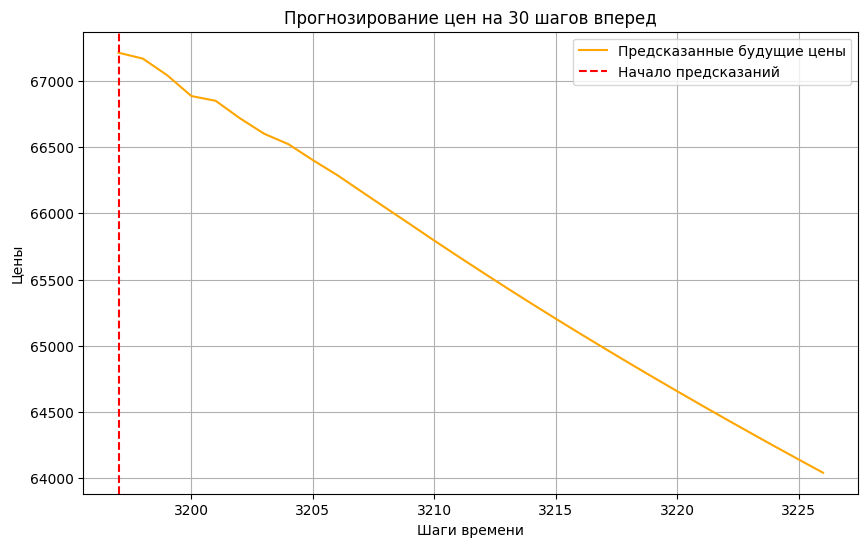

In [ ]:
# Предсказание на H шагов вперед
H = 30  # Количество шагов вперед
predicted_prices = []

# Начнем с последнего известного значения
last_input = scaled_prices[-window_size:]

for _ in range(H):
    # Прогнозируем следующее значение
    next_price = model.predict(last_input.reshape((1, window_size, 1)))
    predicted_prices.append(next_price[0, 0])

    # Обновляем входные данные
    last_input = np.append(last_input[1:], next_price).reshape(window_size, 1)

# Обратная нормализация
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Визуализация результатов с подписями
plt.figure(figsize=(10, 6))
plt.plot(range(len(scaled_prices), len(scaled_prices) + H), predicted_prices, label='Предсказанные будущие цены', color='orange')
plt.axvline(x=len(scaled_prices), color='red', linestyle='--', label='Начало предсказаний')
plt.title('Прогнозирование цен на 30 шагов вперед')
plt.xlabel('Шаги времени')
plt.ylabel('Цены')
plt.legend()
plt.grid()
plt.show()

Для повышения качества модели и проверки её эффективности можно выделить несколько ключевых этапов:

1. **Внедрение k-Fold кросс-валидации:** Временные ряды требуют особого подхода к валидации, учитывающего временную структуру данных. Рекомендуется использовать метод **TimeSeriesSplit** из библиотеки `sklearn.model_selection`, который обеспечивает разделение данных таким образом, что валидация осуществляется на будущих значениях.

2. **Анализ качества данных перед моделированием:** Перед обучением рекуррентной нейронной сети (RNN) необходимо провести проверку данных на наличие выбросов, трендов и сезонности. Эти факторы могут существенно повлиять на точность предсказаний, и их коррекция зачастую приводит к улучшению результатов.

3. **Проверка на стационарность:** Важно провести тест на стационарность данных с использованием автоматического дифференцирования. Если данные не являются стационарными, необходимо применять тест Дики-Фуллера (ADF) и реализовать автоматическое преобразование данных с помощью разностей, если они не проходят данный тест.

4. **Оценка остатков модели:** Анализ остатков (разностей между фактическими и предсказанными значениями) позволяет выявить автокорреляции и недоученные паттерны. Важно проверить корреляцию остатков с использованием автокорреляционной функции (ACF).

### Необходимость проверки на стационарность в RNN

Проверка на стационарность данных является важным этапом при работе с временными рядами, особенно в контексте рекуррентных нейронных сетей (RNN). Хотя RNN обладают способностью моделировать сложные зависимости во временных данных, наличие нестационарных компонентов может привести к ухудшению качества предсказаний.

1. **Сложные зависимости:** RNN могут эффективно обрабатывать временные зависимости, однако, если данные имеют тренды или сезонные колебания, это может затруднить обучение модели. Нестационарные данные могут привести к тому, что модель будет запоминать эти паттерны, что не всегда соответствует реальным временным зависимостям.

2. **Устойчивость к переобучению:** Проверка на стационарность и, при необходимости, преобразование данных (например, с помощью дифференцирования) могут снизить риск переобучения модели. Модель будет сосредоточена на выявлении истинных зависимостей, а не на случайных флуктуациях.

3. **Упрощение модели:** Стационарные данные позволяют использовать более простые модели, что может быть полезно для интерпретации и понимания результатов. В случае RNN это может привести к более быстрому и эффективному обучению.

4. **Тестирование гипотез:** Проверка на стационарность, например, с помощью теста Дики-Фуллера, предоставляет информацию о структуре данных, что может быть полезно для формулирования гипотез о будущих значениях.

Таким образом, хотя RNN могут работать с нестационарными данными, предварительная проверка на стационарность и соответствующая трансформация данных могут значительно улучшить производительность модели и качество предсказаний.



Данный подход позволит более эффективно оценить качество модели и улучшить её предсказательные способности.

### Обновленный код с использованием TimeSeriesSplit и проверками качества данных



ADF Statistic: -0.6393786099569074
p-value: 0.8618335511367365
Ряд не стационарный. Применим автоматическое дифференцирование.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


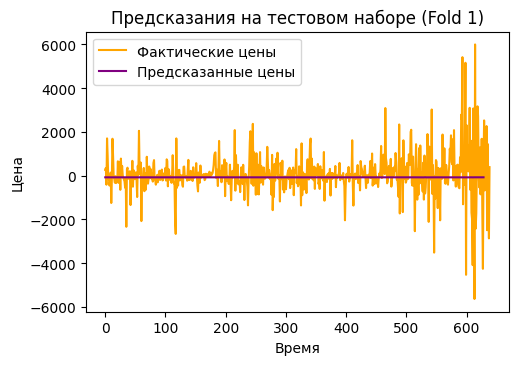

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для проверки на стационарность
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] < 0.05  # Если p-value < 0.05, ряд стационарный

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Анализ качества данных
if data.isnull().values.any():
    print("Данные содержат пропуски. Необходимо обработать пропуски.")
    # Пример обработки пропусков
    data.fillna(method='ffill', inplace=True)

# Проверка на стационарность
is_stationary = test_stationarity(prices)
if not is_stationary:
    print("Ряд не стационарный. Применим автоматическое дифференцирование.")
    prices = np.diff(prices, axis=0)[1:]  # Убираем первый элемент после дифференцирования

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# K-Fold кросс-валидация
kf = KFold(n_splits=5)
results = []

for train_index, test_index in kf.split(scaled_prices):
    train, test = scaled_prices[train_index], scaled_prices[test_index]

    # Генерация временных последовательностей
    window_size = 10
    train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=1)
    test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=1)

    # Создание и обучение модели
    model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(train_generator, epochs=50, verbose=0)

    # Предсказания
    predictions = model.predict(test_generator)
    predictions = scaler.inverse_transform(predictions)  # Обратная нормализация

    # Сохранение результатов для анализа
    results.append(predictions)

# Визуализация результатов
plt.figure(figsize=(12, 8))

# График тестовых данных и прогнозирования для первого фолда
plt.subplot(2, 2, 1)
plt.plot(scaler.inverse_transform(test_generator.targets), label='Фактические цены', color='orange')
plt.plot(results[0], label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе (Fold 1)')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

##RNN для многомерного временного ряда
Чтобы адаптировать наш код для многомерного временного ряда, вам нужно изменить входные данные и форму данных в модели. Вот обновленный код:


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0352 - val_loss: 4.6356e-04
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - val_loss: 2.9224e-04
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 1.9022e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 1.7584e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 3.0113e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 1.4086e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 1.5023e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - val_loss: 1.1500e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.6280e-04 - val_loss: 3.3140e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 1.3936e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 5.9934e-05
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━

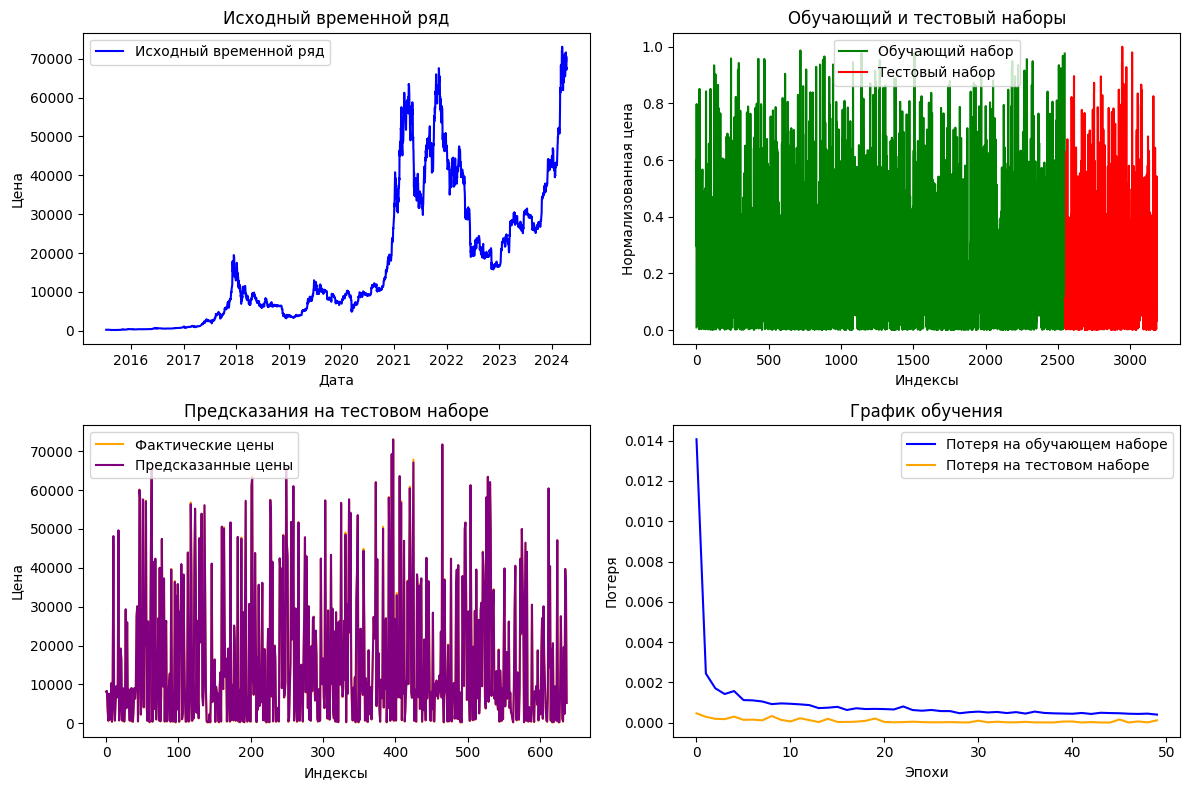

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Чтение и предобработка данных
df = pd.read_csv('/content/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Нормализация данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Параметры для временного ряда
window_size = 10  # Размер окна
num_features = scaled_data.shape[1]  # Количество признаков

# Формирование входных данных X и выходных данных Y
X, Y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i + window_size])
    Y.append(scaled_data[i + window_size, 0])  # Предсказываем столбец 'Close'

X = np.array(X)
Y = np.array(Y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Создание модели
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features)),
    Dropout(0.2),
    Dense(1)  # Один выходной нейрон для предсказания одной величины
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Настройка EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, Y_train,
                    epochs=50,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping])

# Предсказания на тестовом наборе
predictions = model.predict(X_test)

# Обратное преобразование предсказанных данных
predictions_full = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_full[:, 0] = predictions.flatten()
predictions_inverse = scaler.inverse_transform(predictions_full)[:, 0]

# Восстановление Y_test для обратной нормализации
Y_test_full = np.zeros((Y_test.shape[0], scaled_data.shape[1]))
Y_test_full[:, 0] = Y_test
Y_test_inverse = scaler.inverse_transform(Y_test_full)[:, 0]

# Визуализация результатов
plt.figure(figsize=(12, 8))

# График исходного временного ряда
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Close'], label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# График обучающего и тестового наборов
train_size = len(X_train)
plt.subplot(2, 2, 2)
plt.plot(range(train_size), Y_train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + len(Y_test)), Y_test, label='Тестовый набор', color='red')
plt.title('Обучающий и тестовый наборы')
plt.xlabel('Индексы')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(Y_test_inverse, label='Фактические цены', color='orange')
plt.plot(predictions_inverse, label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Индексы')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на тестовом наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

##3. RNN для кластеризации временных рядов

Кластеризация временных рядов — это метод анализа, который позволяет группировать временные ряды на основе их схожести. Этот подход может быть полезен для выявления паттернов, трендов и аномалий в данных. Основные аспекты кластеризации временных рядов включают:

1. **Сравнение временных рядов**: Кластеризация помогает сравнивать временные ряды, выявляя те, которые имеют схожие характеристики, например, сезонность или тренды.

2. **Методы кластеризации**: Для кластеризации временных рядов могут использоваться различные алгоритмы, такие как K-средних, иерархическая кластеризация и другие методы, которые учитывают временные зависимости и структуру данных.

3. **Применение**: Кластеризация может быть использована в различных областях, включая финансовый анализ, мониторинг здоровья, прогнозирование спроса и многое другое.

4. **Предобработка данных**: Часто перед кластеризацией временные ряды нормализуют или трансформируют, чтобы улучшить качество кластеризации.

Таким образом, кластеризация временных рядов является мощным инструментом для анализа и интерпретации сложных временных данных.


Вот подход, который объединяет RNN для извлечения признаков с методом кластеризации:

1. **Извлечение признаков с помощью RNN**: RNN обучается на временных последовательностях, но вместо использования финального слоя для предсказания значений, мы будем использовать ее скрытые состояния (hidden states) как вектор признаков.
2. **Кластеризация скрытых состояний**: После извлечения скрытых состояний для всех временных окон можно применять алгоритм кластеризации, чтобы группировать временные ряды на основе этих представлений.

Вот пример кода, в котором используется RNN для создания представлений (эмбеддингов), после чего выполняется кластеризация:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


<ipython-input-45-b70d6235ba10>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters['Cluster'] = clusters


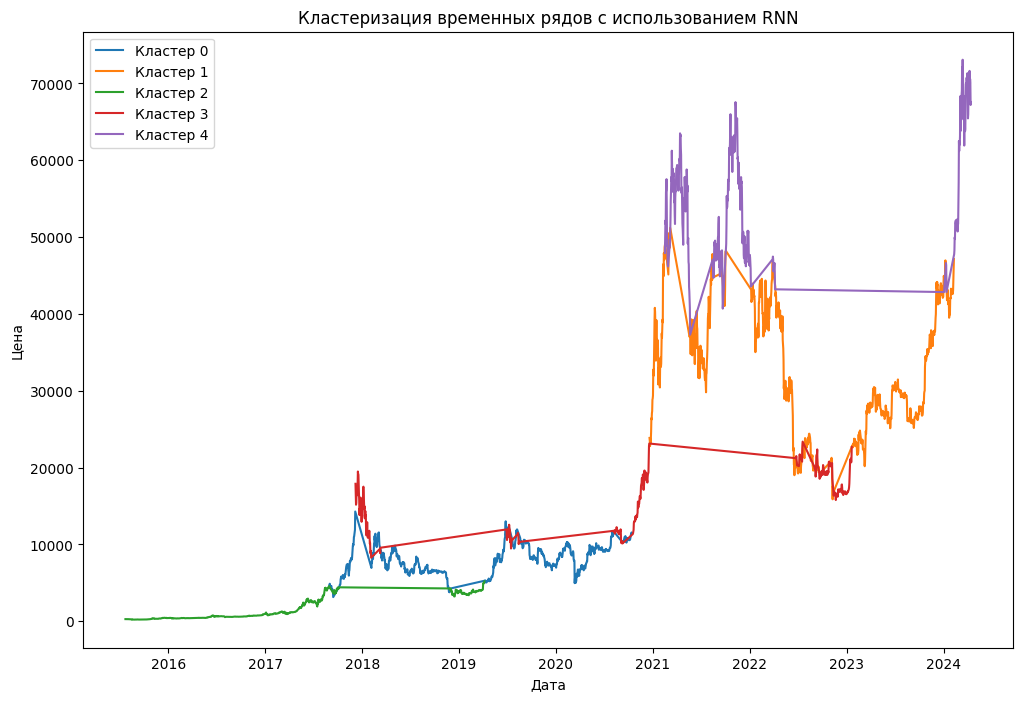

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Model

# Загрузка и предобработка данных
df = pd.read_csv('/content/BTC-USD.csv')  # Замените на ваш файл
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Нормализация данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Определение параметров окна
window_size = 10  # Размер окна
num_features = scaled_data.shape[1]  # Количество признаков

# Подготовка входных данных для RNN
sequences = []
for i in range(len(scaled_data) - window_size):
    sequences.append(scaled_data[i:i + window_size])

sequences = np.array(sequences)  # Преобразуем в numpy массив

# Определение модели RNN для извлечения признаков
feature_extractor = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, num_features), return_sequences=False),
    Dense(10, activation='relu')  # Слой для создания компактного представления
])

# Получение эмбеддингов для всех последовательностей
features = feature_extractor.predict(sequences)

# Кластеризация с использованием KMeans
num_clusters = 5  # Определите количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Добавление кластеров в DataFrame для анализа
df_clusters = df.iloc[window_size:]
df_clusters['Cluster'] = clusters

# Визуализация кластеров
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    cluster_data = df_clusters[df_clusters['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['Close'], label=f'Кластер {cluster}')

plt.title('Кластеризация временных рядов с использованием RNN')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()



### Пояснение

1. **Извлечение эмбеддингов**: Модель RNN обучается и получает эмбеддинги (представления) для каждой временной последовательности длиной `window_size`. Эти представления передаются через полносвязный слой для создания вектора признаков размером 10.
2. **Кластеризация**: После извлечения признаков с помощью RNN, `KMeans` выполняет кластеризацию на этих векторах, представляющих временные ряды.
3. **Визуализация кластеров**: Результаты кластеризации можно визуализировать, чтобы увидеть, как временные ряды группируются по кластерам.

Этот метод позволяет использовать преимущества RNN для анализа временных данных и эффективно выполнять кластеризацию на основе скрытых закономерностей.

##3. RNN прогнозирование цен на жилья

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 28/516 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1572

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0597 - val_loss: 0.0333
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0364 - val_loss: 0.0293
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0278 - val_loss: 0.0307
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0289 - val_loss: 0.0309
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0257 - val_loss: 0.0232
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0266 - val_loss: 0.0230
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0280 - val_loss: 0.0225
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0264 - val_loss: 0.0227
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0265 - val_loss: 0.0229
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0228 - val_loss: 0.0251
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0239 - val_loss: 0.0228
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - los

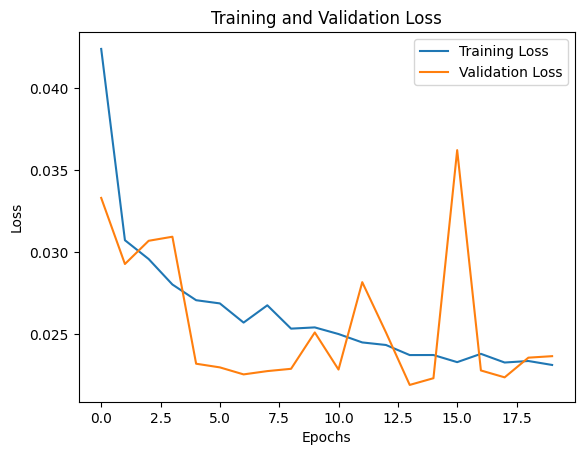

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


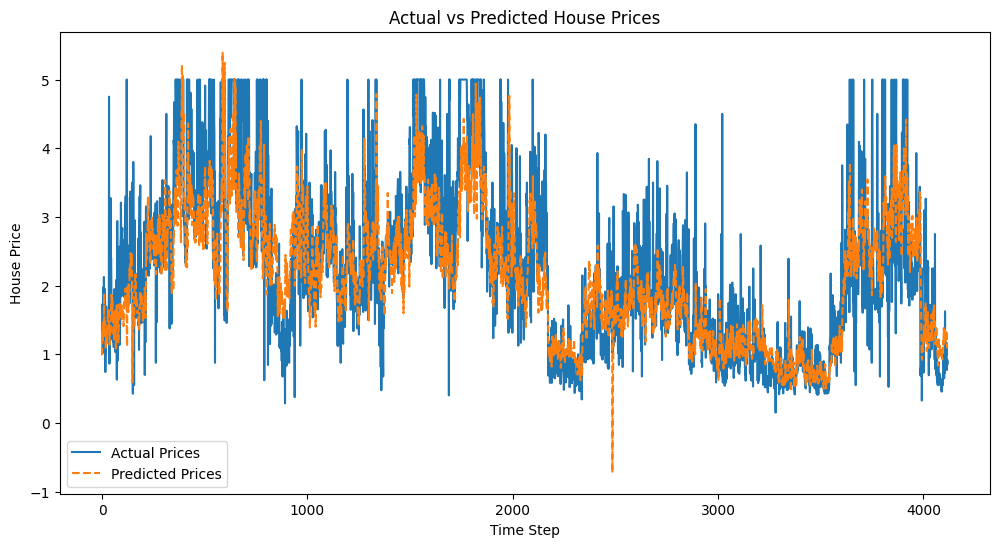

In [ ]:
# Импортируем библиотеки
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка альтернативного датасета California Housing
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target  # Добавляем столбец с ценой

# Масштабирование признаков для улучшения производительности RNN
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Преобразуем в DataFrame для удобства обработки
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Разделение данных на признаки и целевую переменную
X, y = scaled_df.drop('PRICE', axis=1).values, scaled_df['PRICE'].values

# Параметры последовательности
sequence_length = 10  # Длина временного окна
batch_size = 32

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Создаем генераторы временных рядов для RNN
train_gen = TimeseriesGenerator(X_train, y_train, length=sequence_length, batch_size=batch_size)
test_gen = TimeseriesGenerator(X_test, y_test, length=sequence_length, batch_size=batch_size)

# Построение модели RNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[1])),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(train_gen, validation_data=test_gen, epochs=20)

# Визуализация графика обучения
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Предсказание на тестовом наборе и визуализация результатов
predictions = model.predict(test_gen)
predicted_prices = scaler.inverse_transform(np.concatenate((X_test[sequence_length:], predictions), axis=1))[:, -1]
actual_prices = scaler.inverse_transform(np.concatenate((X_test[sequence_length:], y_test[sequence_length:].reshape(-1, 1)), axis=1))[:, -1]

# Построение графика реальных и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Time Step')
plt.ylabel('House Price')
plt.legend()
plt.show()


## Заключение

Создание RNN моделей с использованием TensorFlow открывает широкие возможности для решения различных задач. Ключ к успеху заключается в правильной подготовке данных, грамотном выборе архитектуры сети и настройке гиперпараметров. Используя приведенные выше шаги, вы сможете разрабатывать и обучать модели RNN для различных приложений, начиная от предсказания временных рядов и заканчивая обработкой естественного языка.
